# 0.0.Entendendo o Problema

- 1.Objetivo do Projeto:
    - 1.1.Classificar se o cliente vai ser inadimplente ou não.
    
    
- 2.Por que o projeto está sendo requistado?
    - 2.1.Acredito que seja pelo motivo de que a empresa está desenvolvendo um sistema de crédito automatico que de um limite adequado para a situação que o cliente está, pois caso a empresa de um emprestimo muito alto para clientes que vão ser possivelmente inadimplentes ela vai está pedenndo dinheiro, pois terá muito mais prejuizo do lucro com esse cliente, em contra partida também temos os clientes que não vão ser inadimplentes e esses sim deve receber um crédito alto para que se fidelizem com o banco e gastem mais, acredito que seja isso.
    
    
- 3.Qual métrica do negócio o projeto vai afetar?

    - 3.1.Em outras palavras onde o projeto vai ajudar a empresa a ganhar mais dinheiro? bem, acredito que os bancos ganhem dinheiro através dos juros pois quando emprestam uma quantidade x para o cliente tendem a receber uma quantidade y maior do que deram, ou seja, o projeto vai afetar na métrica de aumento do lucro da empresa e a queda do prejuizo, pois no fim uma das grandes formas dos bancos ganharem dinherio e através desse metódo.
        - Receita = juros que vem dos créditos
        - + Mais clientes(não inadimplente) + juros = Receita.
        
    - 3.2.No fim vamos buscar melhorar a métrica de juros, pois a empresa sabendo qual e o cliente com menos chance de ser inadimplente vai poder investir mais nele, e esse investimento ira trazer mais juros pois o cliente vai gasta mais, e isso vai fazer o faturamento da empresa aumentar.
 
 
- 4.Proposta de Solução
    - 4.1.Para resolver esse problema eu vou criar um modelo de Machine Learning que consiga indentificar quais são os clientes com maiores chances de serem inadimplentes, o modelo vai pedir as informações sobre o cliente e no fim retorna a classificação dele, para fazer isso será necessario passar por diversos ciclos para indentificação de problemas, pois cada problema dependendo da proporção vai gerar um novo ciclo, por exemplo certamente vamos está lidando com dados desbalaceandos, estão vamos precisa de um ciclo de balanceamento de dados.
    
- 5.O que será entrgue no fim?
    - 5.1.No fim dos ciclos do projeto eu espero ter um modelo que Tenha uma precisão de indentificar clientes inadimplente maior de 75%
    - 5.2.Um WebApp que vai funciona da seguiente forma:
        - input: Dados do clientes, as features que o modelo usou para indentificar se vai inadimplente ou não.
        - output: Uma foto que sendo verde significa que o cliente não vai ser inadimplente e caso ele for inadimplente retorna uma foto vermelha.
        
        
obs: Eu sei que existem outras formas dos bancos ganherem dinheiro, mas vou simplificar aqui falando apenas do juros, já que e a métrica que vamos buscar melhorar.

# 1.0.Imports

In [1]:
#Libraries Paddron
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import random
#--------------------
#Machine Learning Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#--------------------
#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score
from scikitplot import metrics as mt
#--------------------
#Regex
import re
#--------------------


#Filter Warnings
import warnings
warnings.filterwarnings("ignore")
#-------------------

#Show all columns
pd.set_option('display.max_columns', None)

## 1.1.Load Data

In [2]:
df_raw = pd.read_csv('datasets/acquisition_train.csv')

## 1.2.Help Functions

In [39]:
def cross_validation(model_name,model,num_folds,x_train,y_train,verbose=False):
    
    acurracy_score_list      = []
    Balacend_Acurracy_list   = []
    Kappa_Score_list         = []
    
    #generate k-fold
    Kfold = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=32)
    i=1
    for train_ix, val_ix in Kfold.split(x_train,y_train):
        if verbose:
            print('Folds: {}/{}'.format(i,num_folds))
            i+=1
        #get folds
        x_train_fold = x_train.iloc[train_ix]
        y_train_fold = y_train.iloc[train_ix]

        x_val_fold = x_train.iloc[val_ix]
        y_val_fold = y_train.iloc[val_ix]
        
        model_trained = model.fit(x_train_fold,y_train_fold)
        
        pred_nn = model_trained.predict(x_val_fold)
        
        acurracy_score = accuracy_score(y_val_fold,pred_nn)
        acurracy_score_list.append(acurracy_score)
        
        Balacend_Acurracy = balanced_accuracy_score(y_val_fold,pred_nn)
        Balacend_Acurracy_list.append(Balacend_Acurracy)
        
        Kappa_Score = cohen_kappa_score(y_val_fold,pred_nn)
        Kappa_Score_list.append(Kappa_Score)
        
    return pd.DataFrame({'Model Name':model_name,
                        'acurracy_score':np.round(np.mean(acurracy_score_list),2).astype(str)+ '+/- '+ np.round(np.std(acurracy_score_list),2).astype(str),
                        'Balacend_Acurracy':np.round(np.mean(Balacend_Acurracy_list),2).astype(str)+ '+/- '+ np.round(np.std(Balacend_Acurracy_list),2).astype(str),
                        'Kappa_Score':np.round(np.mean(Kappa_Score_list),2).astype(str)+ '+/- '+ np.round(np.std(Kappa_Score_list),2).astype(str)},index=[0])


def data_dimensions(df):
    print('Number of Rows: {}'.format(df.shape[0]))
    print('Number of Columns: {}'.format(df.shape[1]))
    return None

# 2.0.Data Description

In [4]:
df1 = df_raw.copy()
df1.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


## 2.1.Data Dimensions

In [5]:
data_dimensions(df1)

Number of Rows: 45000
Number of Columns: 43


## 2.2.Data types

In [6]:
df1.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

## 2.3.Change types

In [7]:
#None

## 2.4.Check NA values

**Removendo colunas:**
Todas as colunas que tiverem 50% ou mais de valores nulos eu vou remover, pelo motivo de eu não querer mudar o fenomeno que estou tentando modelar, pois vou acabar inviezando o modelo e criando algo que não condiz com a realidade.

In [8]:
aux = pd.DataFrame(index=df1.isnull().sum().index, data=df1.isnull().sum().values).rename(columns={0:'Values NA'})
aux = aux.sort_values(by='Values NA',ascending=False)
aux['% NA'] = 100*round(df1.isnull().sum() / len(df1),2)
aux[(aux['Values NA'] > 0) & (aux['% NA'] > 50)] #cols to drop

,Values NA,% NA
target_fraud,43478,97.0
last_amount_borrowed,29956,67.0
last_borrowed_in_months,29956,67.0
ok_since,26545,59.0


In [9]:
aux[(aux['Values NA'] > 0) & (aux['% NA'] < 50)] # cols to fill

,Values NA,% NA
external_data_provider_credit_checks_last_year,15124,34.0
credit_limit,13800,31.0
n_issues,11544,26.0
facebook_profile,4458,10.0
marketing_channel,3578,8.0
job_name,3336,7.0
target_default,3259,7.0
external_data_provider_email_seen_before,2233,5.0
lat_lon,1363,3.0
user_agent,722,2.0


## 2.5.FIll or Drop NA values

**Preenchendo valores nulos:**

- Colunas Numericas:

    - Para preecher as variaveis continuas eu analise as médidas de posição central e a distribuição da variavel, para ter certeza que não ia está modificando o fenemeno, então cada variavel que eu substituir o valor pela média e mediana foi pelo fato de está proximo de uma distribuição normal.

- Colunas Categoricas:

  - Já as variaveis categoricas eu busquei substituir pela moda, claro que tenho o conhecimento de que pequenas mundaçãs assim podem inviezar o modelo e fazer ele aprender algo que não condiz com a realidade, mas vai ser um teste, caso eu veja que o modelo não está perfomando bem, principalmente na cross_validation eu volto aqui e faço outra substituição de dados.

In [10]:
cols_na = ['target_fraud','last_amount_borrowed','last_borrowed_in_months','ok_since',
           'external_data_provider_credit_checks_last_2_year', # columns with a large quantity of na valeus (=>50%)
           'user_agent','profile_tags'] #columns I think it has little relevance

df1 = df1.drop(cols_na,axis=1)

### 2.5.1.Fill NA values with mean

In [11]:
#score_3
df1['score_3'] = df1['score_3'].fillna(df1['score_3'].mean())
#risk_rate
df1['risk_rate'] = df1['risk_rate'].fillna(df1['risk_rate'].mean())
#income
df1['income'] = df1['income'].fillna(df1['income'].median())
#n_accounts
df1['n_accounts'] = df1['n_accounts'].fillna(df1['n_accounts'].mean())

### 2.5.2.Fill NA values with median

In [12]:
#n_issues
#method = fill values with median
#reason = because the values is approached to normal distribution
df1['n_issues'] = df1['n_issues'].fillna(df1['n_issues'].median())

### 2.5.3.Fill Na values with mode

In [13]:
#marketing_channel
df1['marketing_channel'] = df1['marketing_channel'].fillna(df1['marketing_channel'].mode(0)[0])

#job_name
df1['job_name'] = df1['job_name'].fillna(df1['job_name'].mode(1)[0])

#external_data_provider_email_seen_before
df1['external_data_provider_email_seen_before'] = df1['external_data_provider_email_seen_before'].fillna(df1['external_data_provider_email_seen_before'].mode(1)[0])

#n_bankruptcies
df1['n_bankruptcies'] = df1['n_bankruptcies'].fillna(df1['n_bankruptcies'].mode(0)[0])

#n_defaulted_loans
df1['n_defaulted_loans'] = df1['n_defaulted_loans'].fillna(df1['n_defaulted_loans'].mode(0)[0])

#reason
df1['reason'] = df1['reason'].fillna(df1['reason'].mode(0)[0])

#channel
df1['channel'] = df1['channel'].fillna(df1['channel'].mode(0)[0])

#score_1
df1['score_1'] = df1['score_1'].fillna(df1['score_1'].mode(0)[0])

#real_state
df1['real_state'] = df1['real_state'].fillna(df1['real_state'].mode(0)[0])

#state
df1['state'] = df1['state'].fillna(df1['state'].mode(0)[0])

#score_2
df1['score_2'] = df1['score_2'].fillna(df1['score_2'].mode(0)[0])

#lat_lon
df1['lat_lon'] = df1['lat_lon'].fillna(df1['lat_lon'].mode(1)[0])

### 2.5.4.Fill NA values with another values

In [14]:
#external_data_provider_credit_checks_last_year
#resoan = substitution with random values to avoid data unbalanced(its a test)
df1['external_data_provider_credit_checks_last_year'] = df1['external_data_provider_credit_checks_last_year'].fillna(random.choice([0,1]))

#credit_limit
#reason = because na values represents to my that this persoan dont have credit limit
df1['credit_limit'] = df1['credit_limit'].fillna(0)


#reason = because Na values in this columns represents to my that person don't have or don't passed zip and facebook profile.
#zip
df1['zip'] = df1['zip'].fillna('no address')
#facebook_profile
df1['facebook_profile'] = df1['facebook_profile'].fillna(False)

In [15]:
#target_default and lat_lon
#reason: target_default: bacause its my target variable
df1 = df1.dropna()

In [16]:
df1.isnull().sum()

ids                                                0
target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
credit_limit                                       0
reason                                             0
income                                             0
facebook_profile                                   0
state                                              0
zip                                                0
channel                                            0
job_name                                           0
real_state                                         0
n_bankruptcies                                

In [17]:
data_dimensions(df1)

Number of Rows: 41741
Number of Columns: 36


## 2.6. Data Cleaning

In [18]:
#cleaning up additional space
df1['target_default'] = df1['target_default'].apply(lambda x: str(x).strip())

# 3.0.Data Filtering

In [19]:
df2 = df1.copy()
df2.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,False,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,10.0,00:60:02,6,gmail.com,2,1.0,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,3,1.0,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,10.0,13:39:03,240,gmail.com,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827


## 3.1.Filter Rows

In [20]:
#Drop data with value Infinit
df2= df2[df2['reported_income']!= np.inf]

## 3.2.Filter columns

# 4.0.Data Preparation

In [21]:
df3 = df2.copy()
df3.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,False,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,10.0,00:60:02,6,gmail.com,2,1.0,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,3,1.0,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,10.0,13:39:03,240,gmail.com,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827


In [22]:
#change text to number
aux = {'False':0,'True':1}
df3['target_default'] = df3['target_default'].map(aux)

# 5.0.Feature Selection

**Removendo colunas categoricas:**
Vou remover todas as colunas do tipo object por agora, pois e necessario fazer uma limpeza de dados mais aprofundada nelas e no processo de Data Preparation e necessario fazer um encondig especifico para cada variavel, eu sei que elas são importantes e eu não vou descartalas vou apenas deixa para usar depois que fizer um tratamento mais adequado, que por agora não é meu objetivo já que nesse primeiro passo o objetivo e apenas ter uma visão geral do problema.

In [23]:
df4 = df3.copy()

In [24]:
cols_number = df4.select_dtypes(include=['int64','float64']).columns
df4 = df4[cols_number]

In [25]:
X = df4.drop('target_default',axis=1)
y = df4['target_default']

# 6.0.Machine Learning Models

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

## 6.1.BaseLine Model

In [27]:
target_list = df4['target_default'].drop_duplicates().sort_values().tolist()
k_num = y_test.shape[0]
target_weights = df4['target_default'].value_counts(normalize=True).sort_index().tolist()

baseline_model = random.choices(population=target_list,
                                k=k_num,
                                weights=target_weights)

## 6.2.GaussianNB

In [28]:
model_gaussian = GaussianNB()

#train model
model_gaussian.fit(X_train,y_train)

#predict
result_gausian = model_gaussian.predict(X_test)

## 6.3.LogisticRegression

In [29]:
model_logic = LogisticRegression()

#train data
model_logic.fit(X_train,y_train)

#predict
result_logic = model_logic.predict(X_test)

# 7.0.Perfomance

### Baseline Model

Accuracy: 72.93%
Balacend Acurracy: 49.35%
Kappa Score: -1.29%
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     10518
           1       0.15      0.15      0.15      1985

    accuracy                           0.73     12503
   macro avg       0.49      0.49      0.49     12503
weighted avg       0.73      0.73      0.73     12503



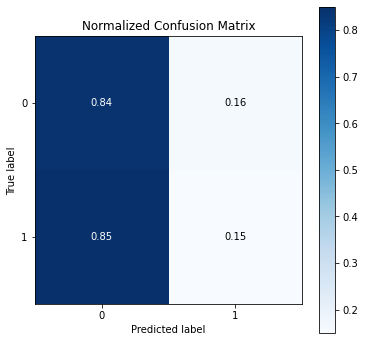

In [30]:
acc = accuracy_score(y_test,baseline_model)
print('Accuracy: {:.2%}'.format(acc))

balacend_acc = balanced_accuracy_score(y_test,baseline_model)
print('Balacend Acurracy: {:.2%}'.format(balacend_acc))

#Kappa Metric
kappa_acc = cohen_kappa_score(y_test,baseline_model)
print('Kappa Score: {:.2%}'.format(kappa_acc))

#classification_report
print(classification_report(y_test,baseline_model))

#plot confusion matrix
mt.plot_confusion_matrix(y_test, baseline_model, normalize=True, figsize=(6,6));

### Gaussian

Accuracy: 84.12%
Balacend Acurracy: 50.00%
Kappa Score: 0.00%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     10518
           1       0.00      0.00      0.00      1985

    accuracy                           0.84     12503
   macro avg       0.42      0.50      0.46     12503
weighted avg       0.71      0.84      0.77     12503



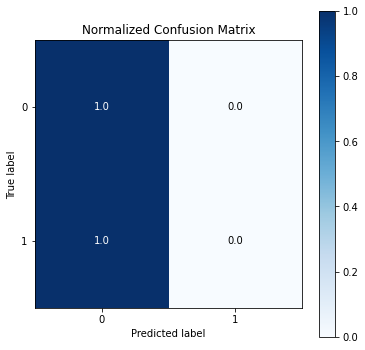

In [31]:
acc = accuracy_score(y_test,result_gausian)
print('Accuracy: {:.2%}'.format(acc))

balacend_acc = balanced_accuracy_score(y_test,result_gausian)
print('Balacend Acurracy: {:.2%}'.format(balacend_acc))

#Kappa Metric
kappa_acc = cohen_kappa_score(y_test,result_gausian)
print('Kappa Score: {:.2%}'.format(kappa_acc))

#classification_report
print(classification_report(y_test,result_gausian))

#plot confusion matrix
mt.plot_confusion_matrix(y_test, result_gausian, normalize=True, figsize=(6,6));

### Logistic Regression

Accuracy: 84.12%
Balacend Acurracy: 50.00%
Kappa Score: 0.00%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     10518
           1       0.00      0.00      0.00      1985

    accuracy                           0.84     12503
   macro avg       0.42      0.50      0.46     12503
weighted avg       0.71      0.84      0.77     12503



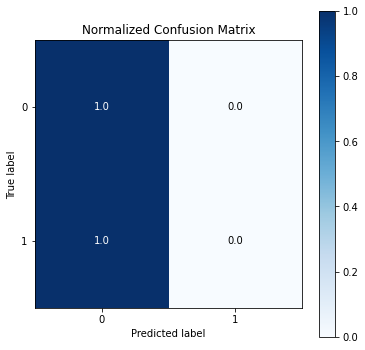

In [32]:
acc = accuracy_score(y_test,result_logic)
print('Accuracy: {:.2%}'.format(acc))

balacend_acc = balanced_accuracy_score(y_test,result_logic)
print('Balacend Acurracy: {:.2%}'.format(balacend_acc))

#Kappa Metric
kappa_acc = cohen_kappa_score(y_test,result_logic)
print('Kappa Score: {:.2%}'.format(kappa_acc))

#classification_report
print(classification_report(y_test,result_logic))

#plot confusion matrix
mt.plot_confusion_matrix(y_test, result_logic, normalize=True, figsize=(6,6));

## Cross Validation Performance

### Gaussian CV

In [42]:
model_gaussian_cv = GaussianNB()
cross_validation("Gaussian NB",model_gaussian_cv,5,X_train,y_train,verbose=True)

Folds: 1/5
Folds: 2/5
Folds: 3/5
Folds: 4/5
Folds: 5/5


,Model Name,acurracy_score,Balacend_Acurracy,Kappa_Score
0,Gaussian NB,0.84+/- 0.0,0.5+/- 0.0,-0.0+/- 0.0


### Logistic Regression CV

In [41]:
model_logic_cv = LogisticRegression()
cross_validation("Logistic Regression",model_logic_cv,5,X_train,y_train,verbose=True)

Folds: 1/5
Folds: 2/5
Folds: 3/5
Folds: 4/5
Folds: 5/5


,Model Name,acurracy_score,Balacend_Acurracy,Kappa_Score
0,Logistic Regression,0.84+/- 0.0,0.5+/- 0.0,0.0+/- 0.0


# Conclusion
**O que foi feito nesta etapa:**
- Nessa etapa eu preenchi os valores NA das features que não estavam tão vazias, cada preechimento que fiz foi com base na distribuição da variavel, então fiz o mais fiel possivel a realidade, também fiz a cross validation que vai nos trazer o valor real do modelo, também usei novas métricas expecificas para trabalhar com valores desbalanceados e por fim criei um modelo de escolhas aleatórias para ser meu baseline, e com base nele que vou saber se modelos mais complexos de ML estão indo bem.

**O que sera feito na proxima etapa?**
- Na próxima etapa eu vou fazer engenheria de atributos que é a criação de novas features a partir das existentes, vou fazer isso para que o modelo tenha mais atributos que expliquem o fenomeno que estou tentando modelar.

**Proximo passo:**
- Feature Engineer